# CNN on MNIST Data set
Objective : By looking into the image predict the Number.

Import data

In [27]:
import keras
from keras.datasets import mnist
import numpy as np

 MNIST : Modified National Institute of standard and Techology Dataset
1) It shows hand written digits images.
2) Pre-processed data we can use them directly to build the algorithm.
3) We can import the data from internet to python using load_data().
4) Data set consists of images with Pixel number.
5) We can directly load the data as Training and Testing.
6) Input variables are images which are in pixel format and output variable only label of images

In [28]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [29]:
# shape of training and testing data set
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In testing dataset total 10 thousands images has 28*28 dimension.
In testing dataset total 10 thousands images has 28*28 dimension.

In [30]:
#Check data from 1st image which is in  pixel formats.
x_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

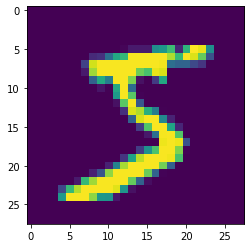

In [31]:
import matplotlib.pyplot as plt
# First Image of dataset
plt.imshow(x_train[0])

In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Normalization 

In [33]:
# pixel range we have 0 to 255 which we have to normalize for 0 to 1
# pixel normalize will available in keras pacakage

x_train=keras.utils.normalize(x_train)
x_test=keras.utils.normalize(x_test)

In [34]:
# CNN will take data in 3-D format
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [35]:
x_train.shape

(60000, 28, 28, 1)

# CNN Modeling

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [37]:
model=Sequential()

# Add Conv layer

In [38]:
model.add(Conv2D(32,(3,3),strides=(1,1),input_shape=(28,28,1),activation="relu"))

# Add Pooling Layer

In [39]:
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

# Add Flatten Layer

In [40]:
 #It will convert  N Dimensional into One layer - which is input layer for ANN 
model.add(Flatten())

# Add Hidden layer

In [41]:
# Kerrnel_initializer : weight  intiatlized method to make error 0 
# units :  Number  of inputs  or number of neurons
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=256))

# Add Ouput layer

In [42]:
model.add(Dense(kernel_initializer="random_uniform",activation="softmax",units=10))

# Compile & fit the model

In [43]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               5120256   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 5,123,146
Trainable params: 5,123,146
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 50s 106ms/step - loss: 0.2103 - accuracy: 0.9388 - val_loss: 0.0744 - val_accuracy: 0.9772
Epoch 2/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0527 - val_accuracy: 0.9817
Epoch 3/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.0454 - val_accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0457 - val_accuracy: 0.9859
Epoch 6/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0489 - val_acc


# Prediction

In [46]:
y_pred=model.predict_classes(x_test)

In [24]:
y_pred[9050]

6

In [25]:
y_test[9050]

6

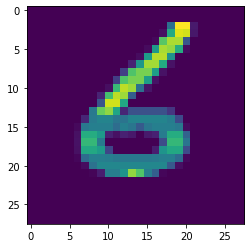

In [26]:

plt.imshow(x_test[9050])

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score  
accuracy_score(y_test,y_pred)